# Akash Limkar

## TSF Task 3: Exploratory Data Analysis - Retail

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\akash\OneDrive\Desktop\DATA SCIENCE\INTERNSHIP\Sparks Foundation\SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### EDA

In [3]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [4]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [5]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Profit and Sales Analysis

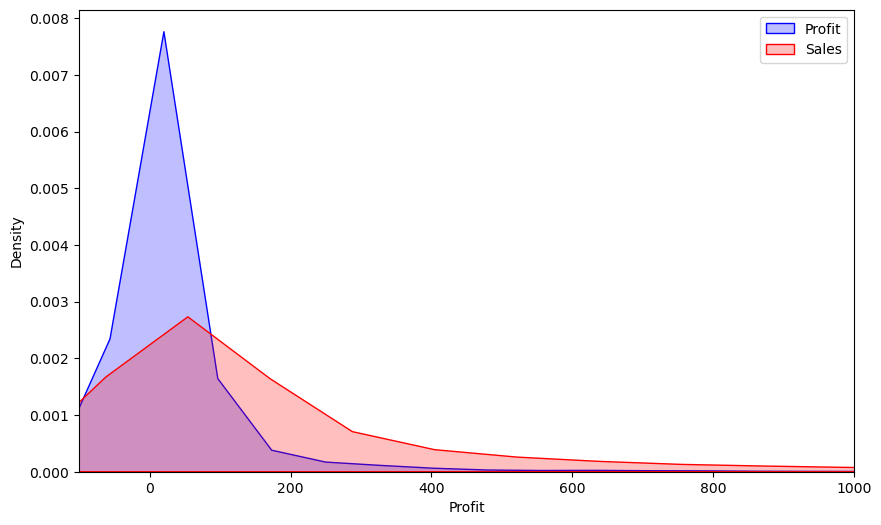

In [6]:
plt.figure(figsize=(10,6))
sns.kdeplot(df['Profit'],color='blue',label='Profit',shade=True)
sns.kdeplot(df['Sales'],color='red',label='Sales',shade=True)
plt.xlim([-100,1000])
plt.legend()

#### Conclusion from Profit and Sales Analysis:
* Profit is more than sales, But in some region it is less
so it can be increased

### Correlation

In [7]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### Heatmap

<Axes: >

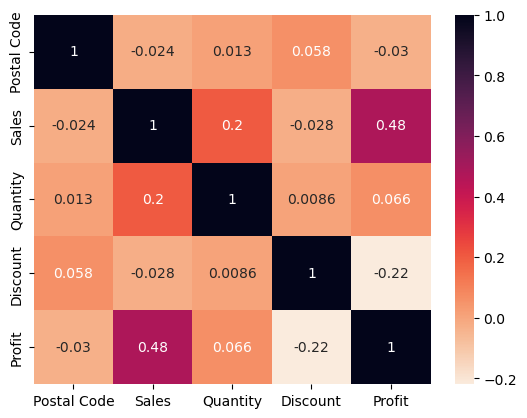

In [8]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)

####  Conclusion from above Correlation Graph :

1) Sales and Profit moderate correlated

2) Sales and Quantity less moderate correlated

3) Profit and Discount negatively correlated

## Count Plot for Each Column

In [9]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

### 1) Ship Mode

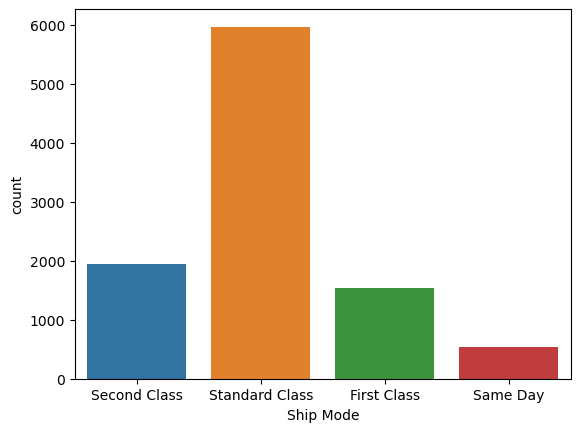

In [10]:
sns.countplot(data=df, x='Ship Mode')
plt.show()

#### Conclusion from Ship Mode :
* Standard Class have highest Deals

### 2) Segmengt

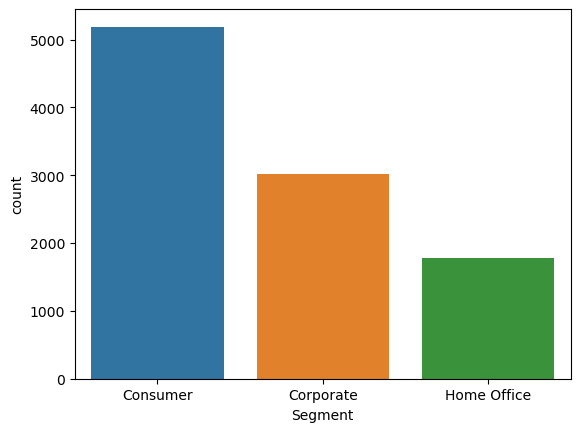

In [11]:
sns.countplot(data=df, x='Segment')
plt.show()

#### Conclusion from Segment :
* Consumers are more other than corporate and Home Office

### 3) Region

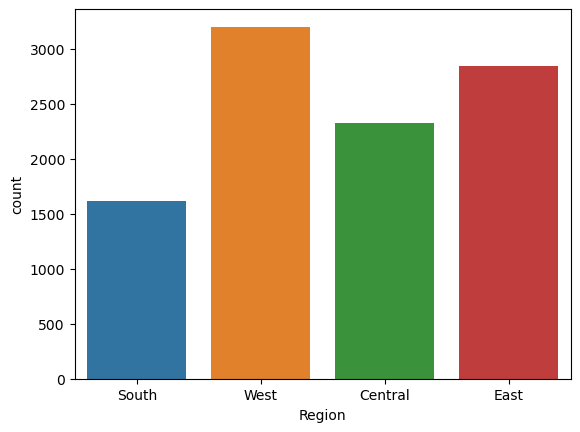

In [12]:
sns.countplot(data=df, x='Region')
plt.show()

#### Conclusion from Region :
* In west region there are  highest sales

### 4) Category

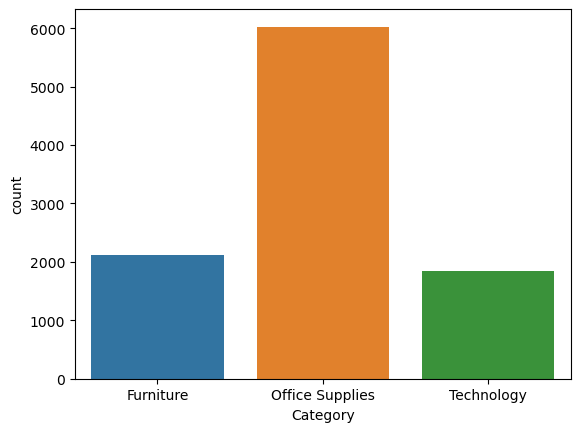

In [13]:
sns.countplot(data=df, x='Category')
plt.show()

#### Conclusion from Category  :
* In Category Office Supplies demands are more than furniture and Techonology

### 5) Sub-Category

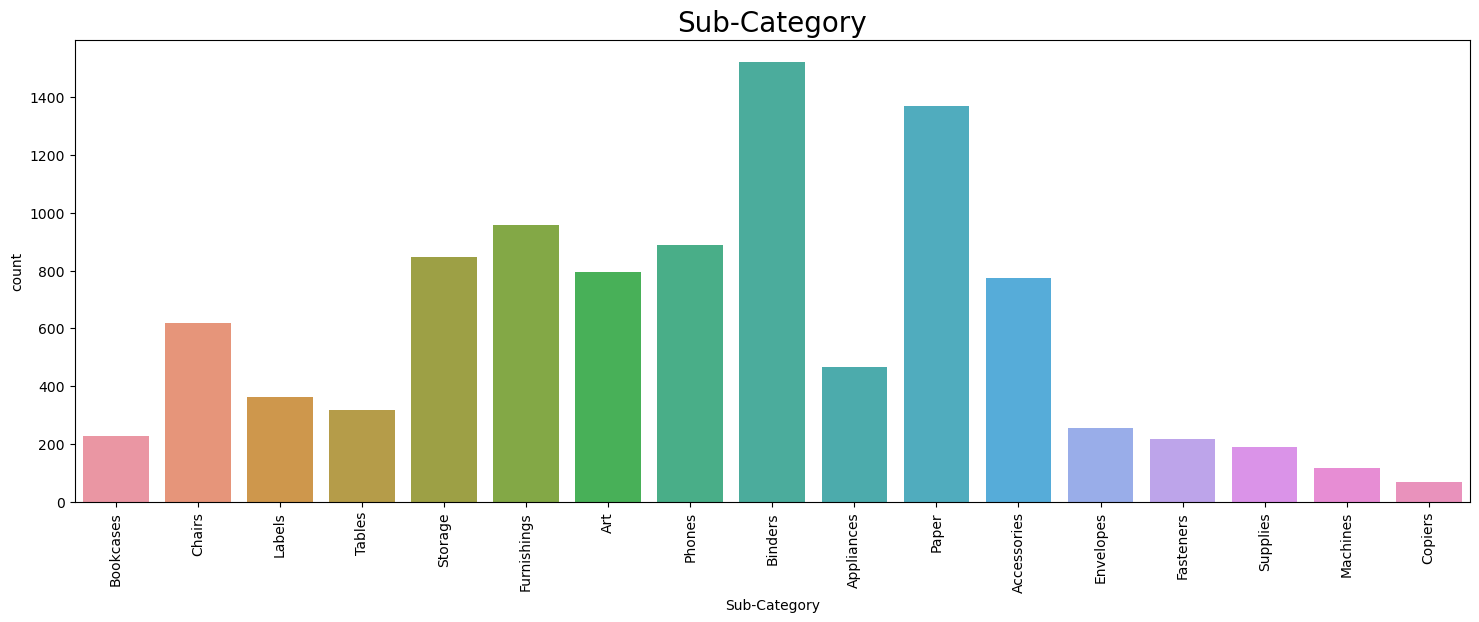

In [14]:
plt.figure(figsize=(18, 6))
sns.countplot(data=df, x='Sub-Category')
plt.title('Sub-Category', fontsize=20)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()

#### Conclusion from SubCategory :
* In subcategory Binders sales are more

## Distribution of Sales and Profit

### Distribution of Sales

<Axes: xlabel='Sales', ylabel='Density'>

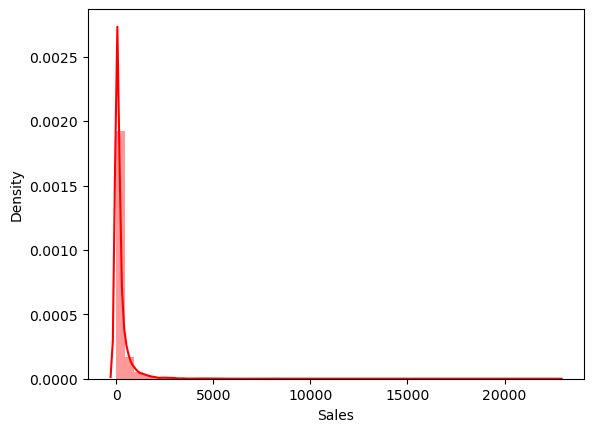

In [15]:
sns.distplot(df['Sales'], color = 'red')

### Distribution of Profit

<Axes: xlabel='Profit', ylabel='Density'>

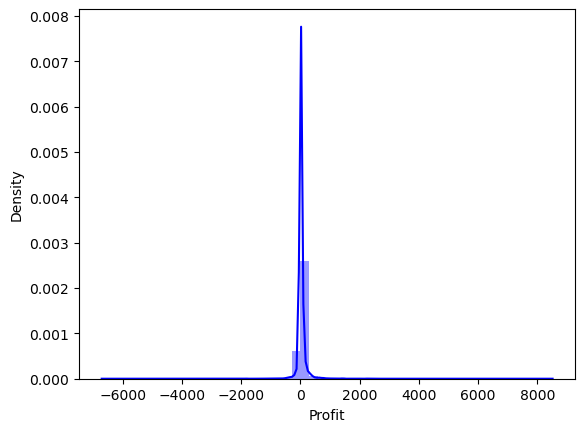

In [16]:
sns.distplot(df['Profit'], color = 'blue')

## State wise Deals

In [17]:
df1 = df['State'].value_counts()

In [18]:
df1.head()

California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: State, dtype: int64

Text(0.5, 1.0, 'State wise Deal')

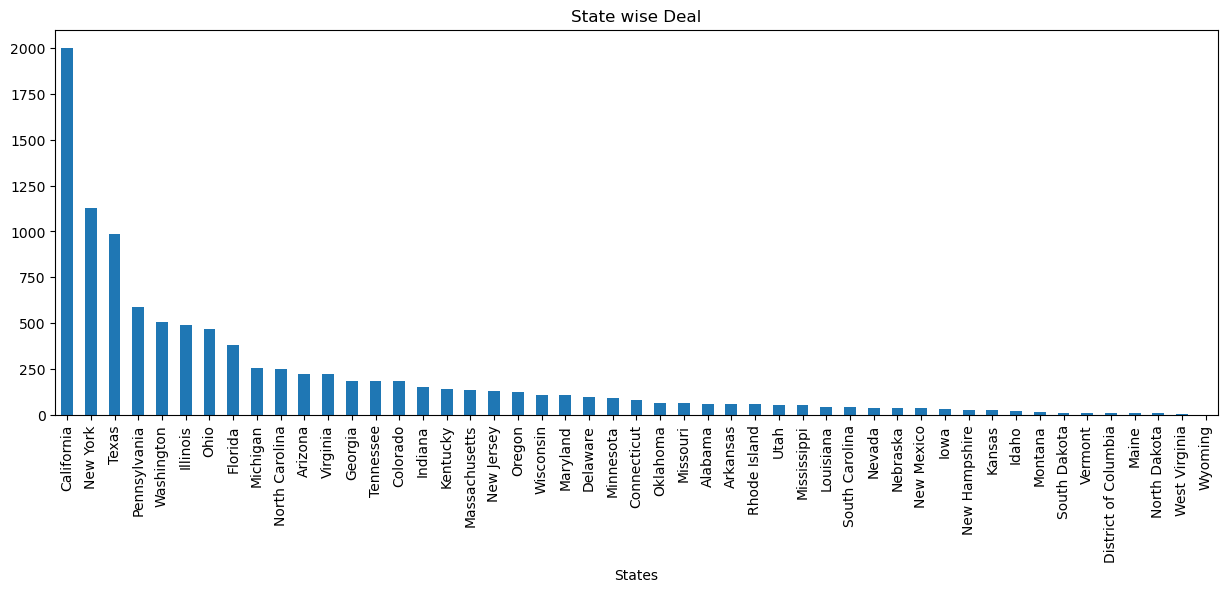

In [19]:
df1.plot(kind='bar',figsize=(15,5))
plt.xlabel('States')
plt.title('State wise Deal')

#### Conclusion from State wise Deal :
* In California state there are highest Deals
* Then Second New York and Third Texas

## City Wise Deal

In [20]:
df2 = df['City'].value_counts()
df2=df2.head(10)

In [21]:
df2.head()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
Name: City, dtype: int64

<Axes: >

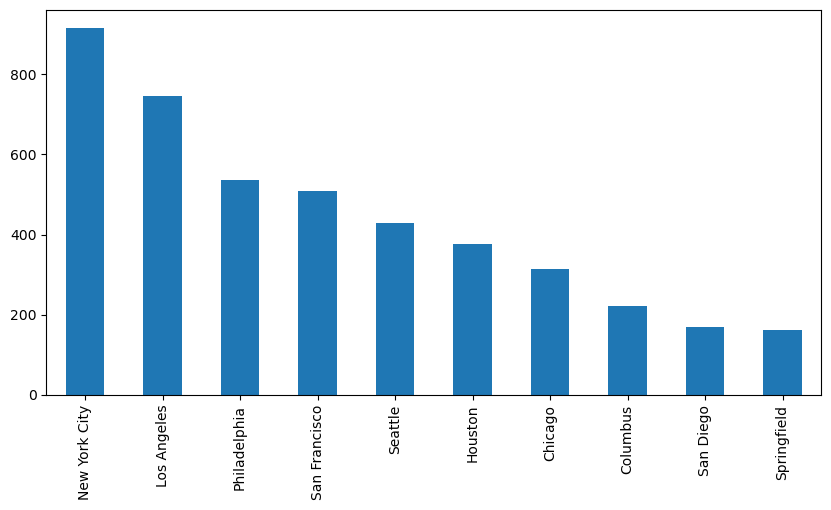

In [22]:
df2.plot(kind='bar',figsize=(10,5))

#### Conclusion from City wise Deals :
* In New York City have are highest Deals
* Then Second Los Angeles and Third Philadelphia

## Segment wise analysis of Profit, Discount and sell

In [23]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [24]:
df_segment= df.groupby(['Segment'])[['Sales', 'Discount', 'Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


Text(0.5, 1.0, 'Segment wise analysis of Sales, Discount, Profit')

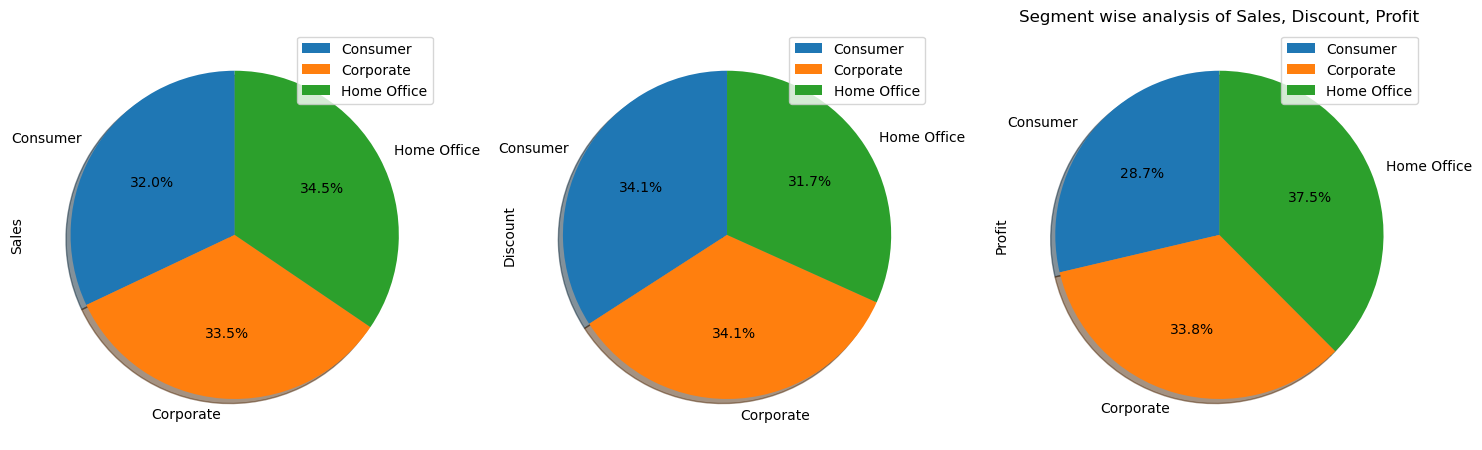

In [25]:
#1. sales 2. Discount 3. Profit
df_segment.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(18, 20),
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_segment.index)
plt.title('Segment wise analysis of Sales, Discount, Profit')

#### Segment wise analysis of Profit, Discount and sell
**Sales:**
  - Consumer : 32%
  - Corporate - 33.5%
  - Home Office : 34.5%
  
**Discount :**
  - Consumer : 15.8%
  - Corporate : 15.8%
  - Home Office : 14.7%
  
**Profit :**

  - Consumer : 15.8%

  - Corporate : 15.8%

  - Home Office : 14.7%

## Statewise analysis of Profit, Discount and sales

In [26]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [27]:
df_state= df.groupby(['State'])[['Sales', 'Discount', 'Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


### State wise Analysis of Profit

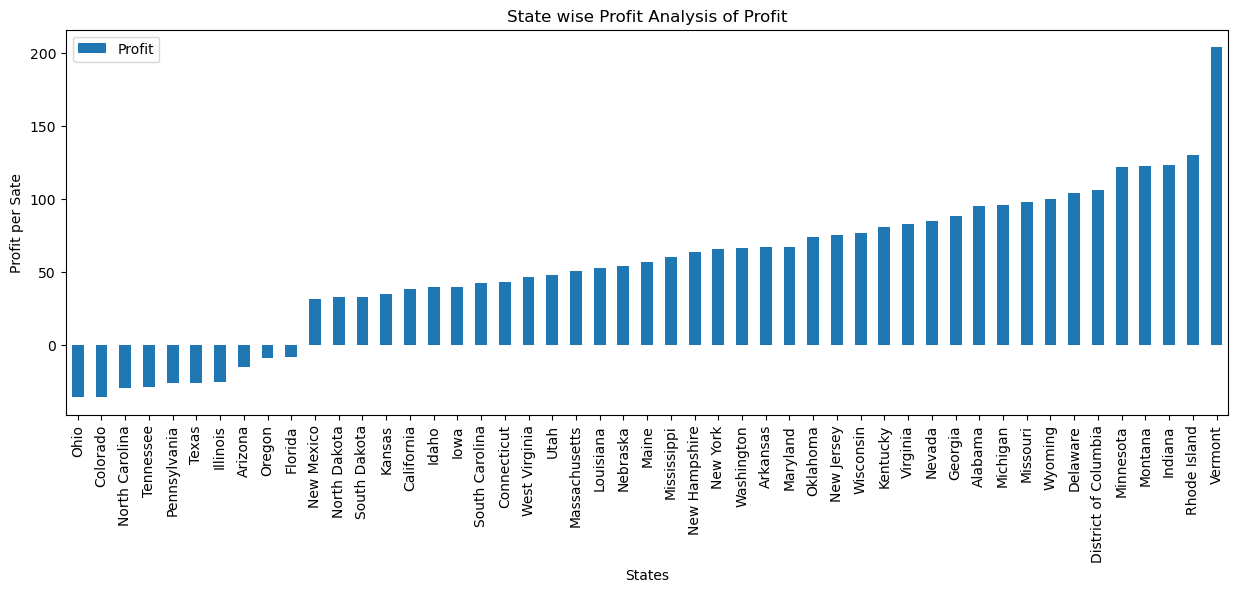

In [28]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind = 'bar', figsize = (15,5))
plt.title('State wise Profit Analysis of Profit')
plt.ylabel('Profit per Sate')
plt.xlabel('States')
plt.show()

#### Conlusion State wise Analysis of Profit :

* Highest Profit State
 **Vermont** 
* Lowest Profit State
 **Ohio**

### State wise Analysis of Discount

In [29]:
df_state2 = df_state1.sort_values('Discount')

Text(0.5, 1.0, 'State wise analysis of Discount')

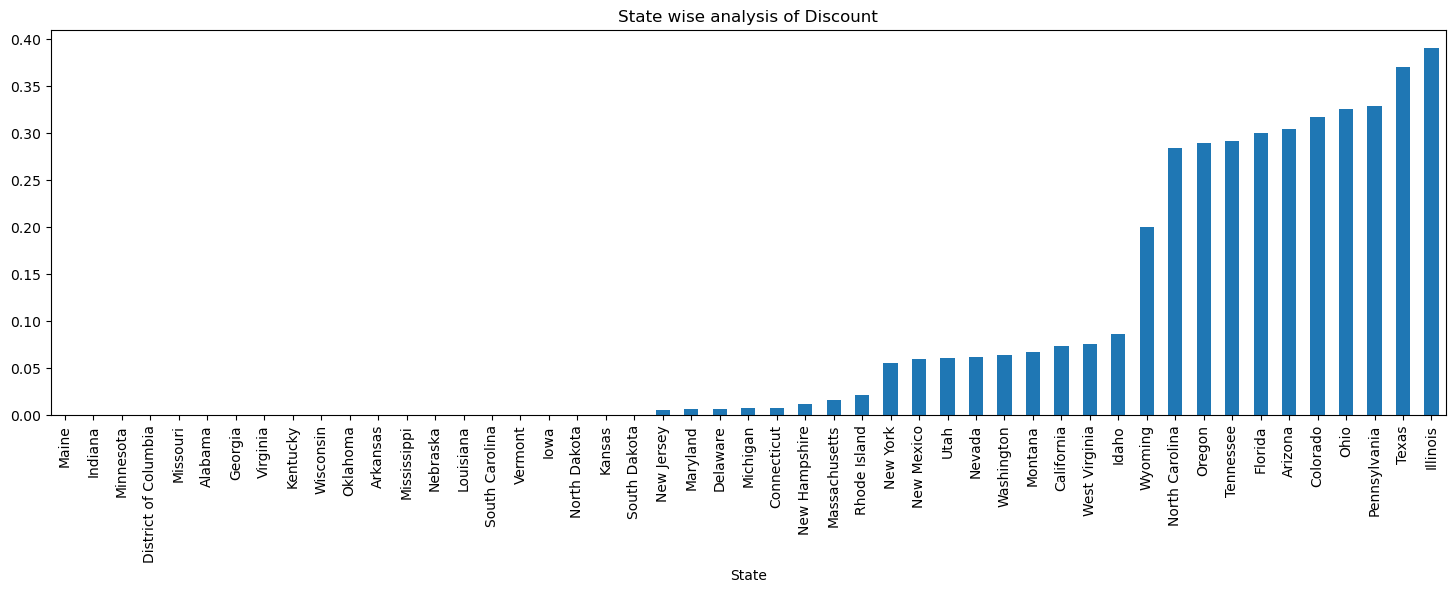

In [30]:
df_state2['Discount'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount')

#### Conlusion State wise Analysis of Discount :

* Highest Discount State 
 **illinois** 
* Lowest Discount State 
 **Maine**

### State wise Analysis of Sales

In [31]:
df_state3 = df_state1.sort_values('Sales')

Text(0.5, 1.0, 'State wise analysis of Discount')

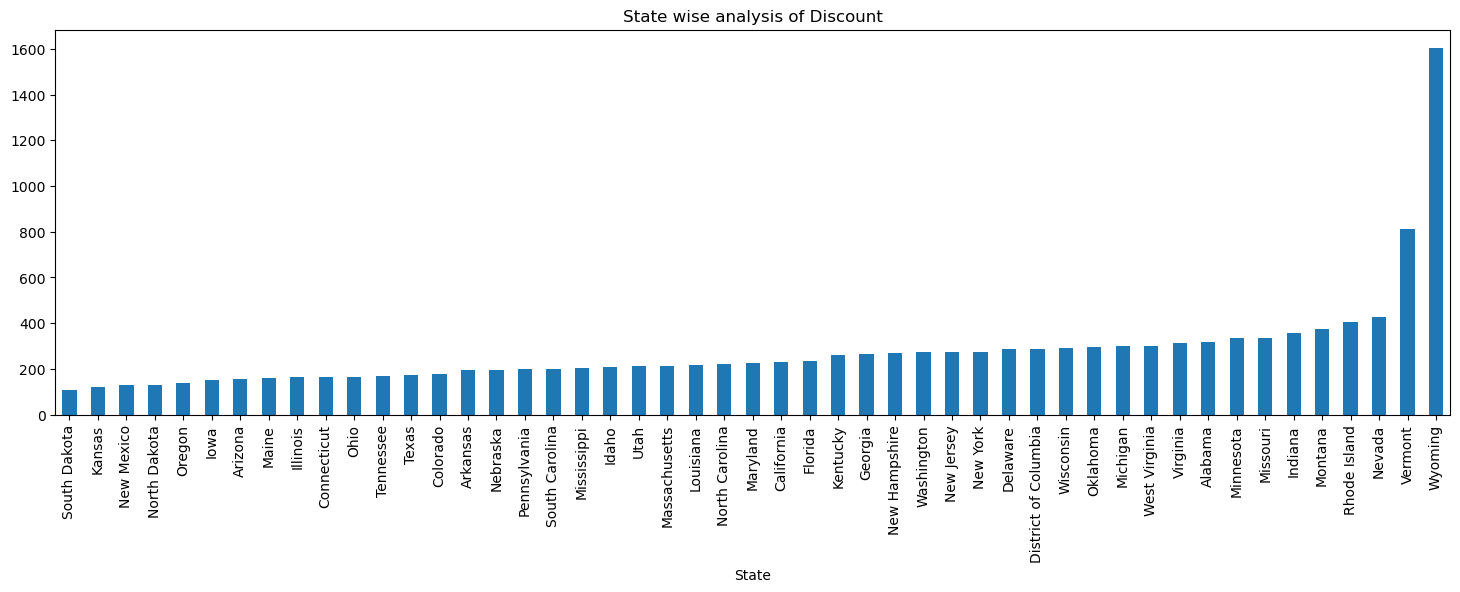

In [32]:
df_state3['Sales'].plot(kind='bar',figsize=(18,5))
plt.title('State wise analysis of Discount')

#### Conlusion State wise Analysis of Sales :

* Highest Sales State
 **Whyoming** 
* Lowest Sales State 
 **South Dakota**

## Citywise Analysis of Profit

In [33]:
df_city= df.groupby(['City'])[['Sales', 'Discount', 'Profit']].mean()
df_city = df_city.sort_values('Profit')
df_city.head(1)

,Sales,Discount,Profit
City,,,
Bethlehem,337.9268,0.38,-200.61916


In [34]:
df_city.tail(1)

,Sales,Discount,Profit
City,,,
Jamestown,2354.395,0.0,642.88575


### City wise analysis of Low profit

Text(0.5, 1.0, 'City wise analysis of profit')

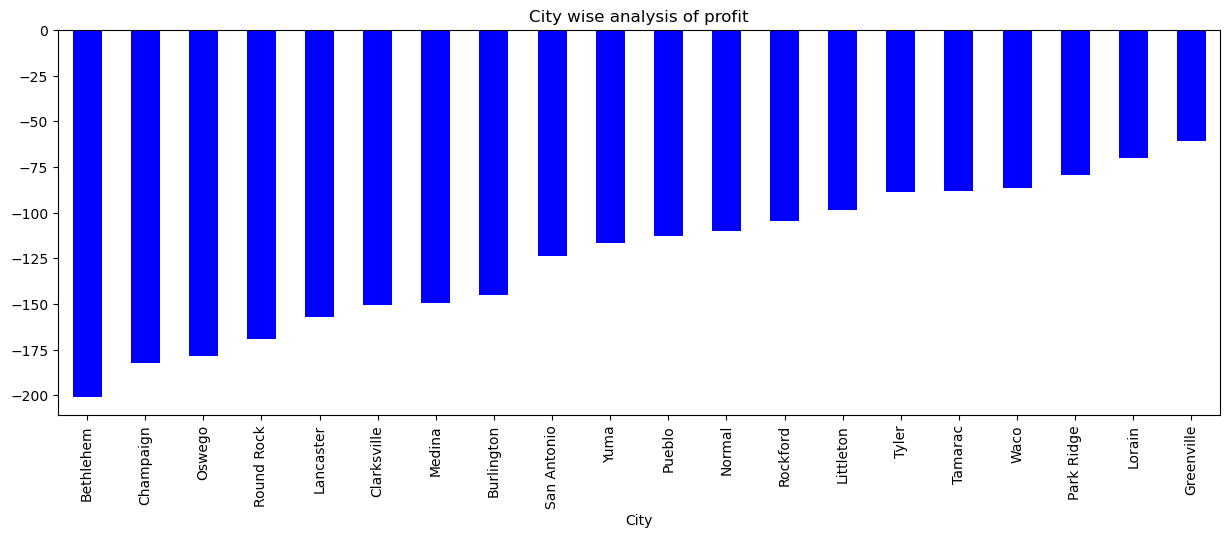

In [35]:
df_city['Profit'].head(20).plot(kind='bar',figsize=(15,5),color = 'blue')
plt.title('City wise analysis of profit')

#### Result
Bethlehem city have the **lowest Profit**

### City wise analysis of High Profit

Text(0.5, 1.0, 'City wise analysis of profit')

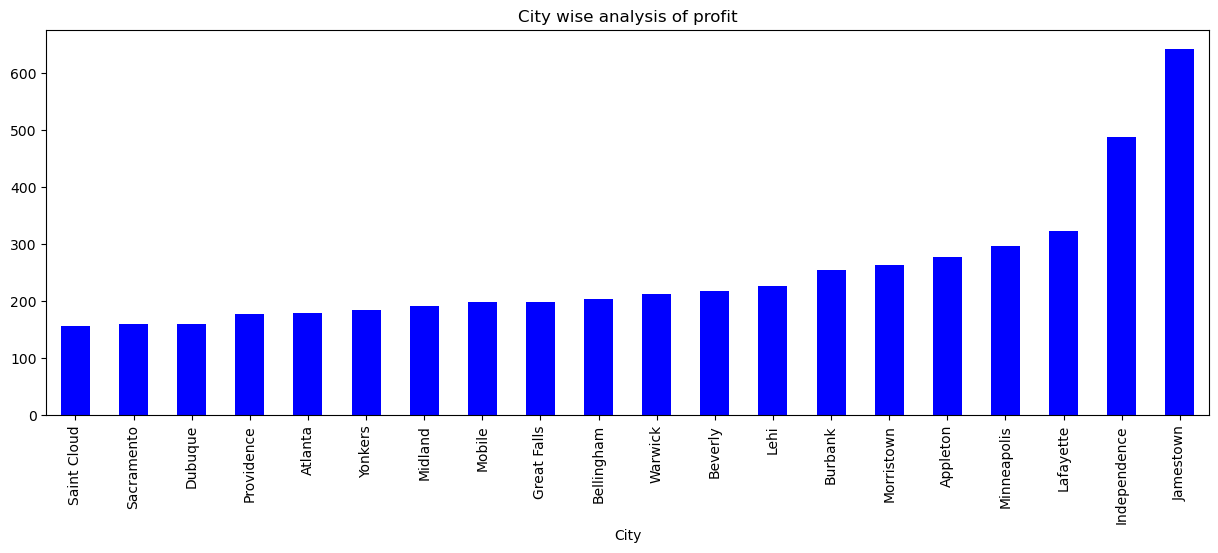

In [36]:
df_city['Profit'].tail(20).plot(kind='bar',figsize=(15,5),color = 'blue')
plt.title('City wise analysis of profit')

#### Result
Jamestown city have the **Higgest Profit**

## Subcategory wise analysis 

### Subcategory wise analysis of Sales

In [37]:
df_subcategory = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_subcategory.head(1)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788


In [38]:
df_subcategory.tail(1)

,Sales,Discount,Profit
Sub-Category,,,
Tables,648.794771,0.261285,-55.565771


<Axes: xlabel='Sub-Category'>

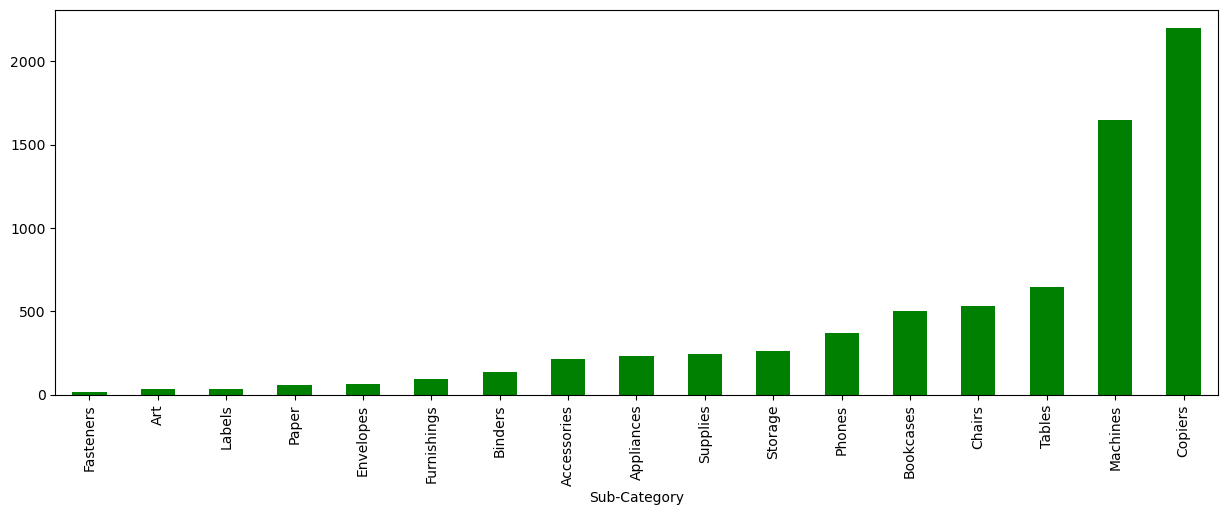

In [39]:
df_subcategory1 = df_subcategory.sort_values('Sales')
df_subcategory1['Sales'].plot(kind='bar',figsize=(15,5),color = 'green')

#### Conlusion Subcategory wise analysis of Sales :

* Highest Sales of Copiers 


### Subcategory wise analysis of Discount

<Axes: xlabel='Sub-Category'>

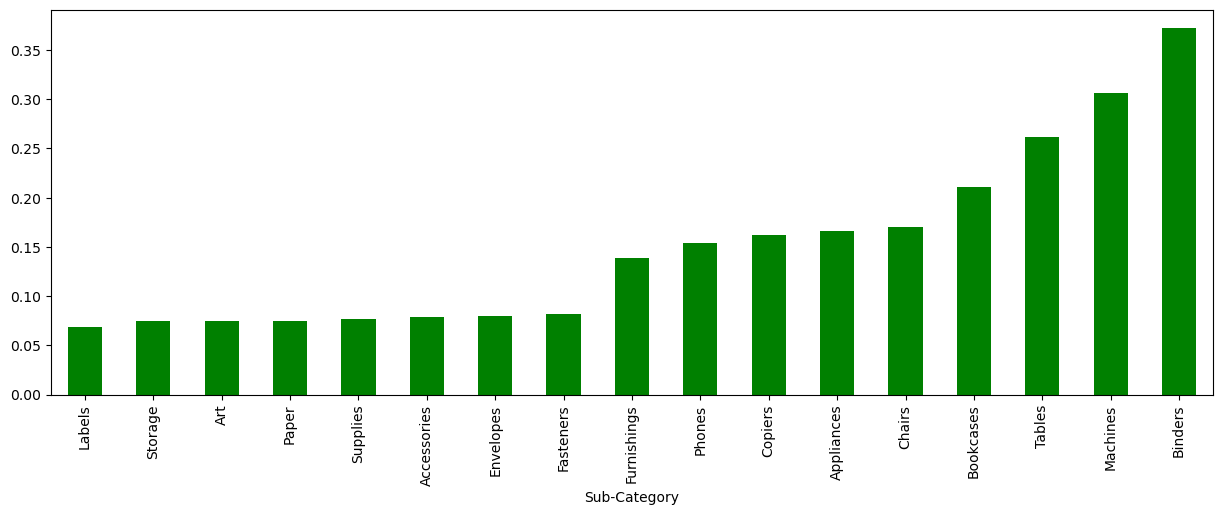

In [40]:
df_subcategory2 = df_subcategory.sort_values('Discount')
df_subcategory2['Discount'].tail(30).plot(kind='bar',figsize=(15,5),color = 'green')

### Conlusion Subcategory wise analysis of Discount :

* Binders Have the highest Discount


### Subcategory wise analysis of Profit

<Axes: xlabel='Sub-Category'>

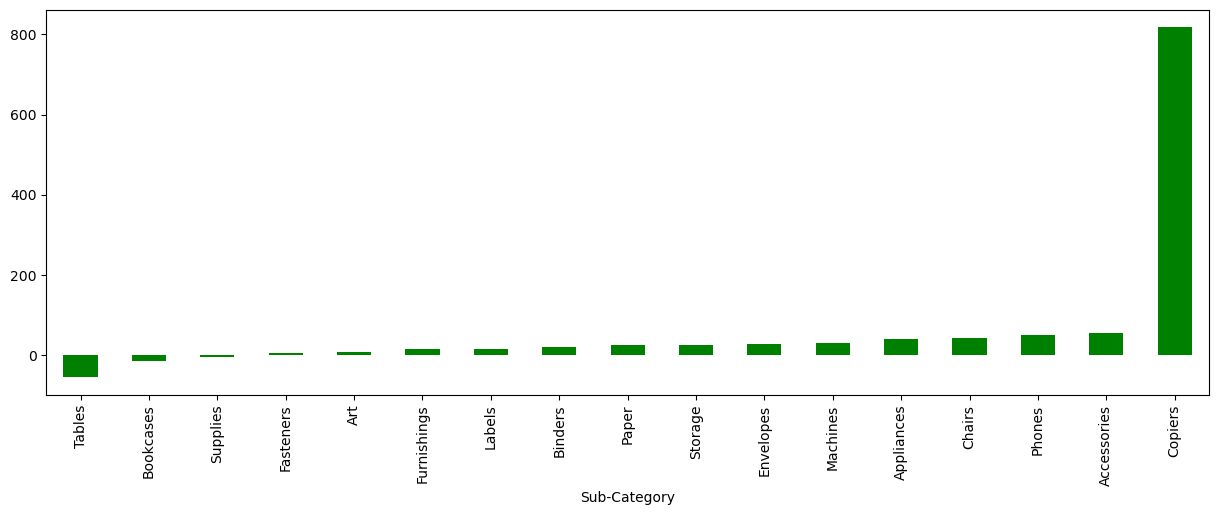

In [41]:
df_subcategory3 = df_subcategory.sort_values('Profit')
df_subcategory3['Profit'].tail(20).plot(kind='bar',figsize=(15,5),color = 'green')


#### Conlusion Subcategory wise analysis of Profit :

* Highest Profit 
 **Copiers** 
* Lowest Profit 
 **Tabels**

# Result


* Profit is more than sales, But in some region it is lessso it can be increased

1) Sales and Profit moderate correlated

2) Sales and Quantity less moderate correlated

3) Profit and Discount negatively correlated

* Standard Class have highest Deals
* Consumers are more other than corporate and Home Office
* In west region there are  highest sale
* In Category Office Supplies demands are more than furniture and Techonology
* In subcategory Binders sales are more
* In California state there are highest Deals
* Then Second New York and Third Texas
* In New York City have are highest Deals
* Then Second Los Angeles and Third Philadelphia

#### Segment wise analysis of Profit, Discount and sell
**Sales:**
  - Consumer : 32%
  - Corporate - 33.5%
  - Home Office : 34.5%
  
**Discount :**
  - Consumer : 15.8%
  - Corporate : 15.8%
  - Home Office : 14.7%
  
**Profit :**
  - Consumer : 15.8%
  - Corporate : 15.8%
  - Home Office : 14.7%

* Highest Profit State
 **Vermont** 
* Lowest Profit State
 **Ohio**
* Highest Discount State
 **illinois** 
* Lowest Discount State 
 **Maine**
* Highest Sales State
 **Whyoming** 
* Lowest Sales State 
 **South Dakota**
 
* lowest Profit Bethlehem city

* Higgest Profit Jamestown city

* Highest Sales of Copiers 


* Binders Have the highest Discount


* Highest Profit 
 **Copiers** 
 
* Lowest Profit 
 **Tabels**

## END